<a href="https://colab.research.google.com/github/stiwari-ds/data-science-competitions/blob/main/topcoder/crowd_for_good-cancer_ml_benchmarking/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import numpy as np
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import f_classif, mutual_info_classif

SEED = 2311

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
train_features_path = '/content/drive/MyDrive/data_science_competitions/topcoder/cancer_ml_benchmarking/data/features_train.csv'
train_labels_path = '/content/drive/MyDrive/data_science_competitions/topcoder/cancer_ml_benchmarking/data/labels_train.csv'

test_features_path = '/content/drive/MyDrive/data_science_competitions/topcoder/cancer_ml_benchmarking/data/features_test.csv'

In [4]:
train = pd.read_csv(train_features_path, header=None)
train_labels = pd.read_csv(train_labels_path, header=None)

test = pd.read_csv(test_features_path, header=None)

In [5]:
features = ['f' + str(i) for i in range(25)]

train.columns = features
test.columns = features

train['target'] = train_labels

In [6]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,target
0,-639.8464,-20.2182,13.1217,0.9697,-3.3194,-0.6270,-1.1598,0.1397,0.2794,0.0870,0.0129,-0.0058,-0.0235,-0.0143,0.0249,-0.0089,-0.0155,0.0157,1.7045e-02,-0.0099,0.0012,0.0035,0.0023,0.0030,-0.0008,1
1,-733.7633,-21.9815,10.7855,7.8574,-3.5591,0.4018,0.1325,0.2518,0.3342,-0.0659,-0.0408,0.0270,0.0397,-0.0201,-0.0178,0.0082,-0.0006,0.0021,-2.1000e-05,-0.0055,0.0015,0.0046,-0.0008,0.0038,-0.0003,1
2,-738.4096,-37.7878,11.9335,11.3547,-0.6615,1.0426,-1.1849,-0.2841,0.0814,0.0915,-0.0468,-0.0157,0.0143,-0.0263,-0.0239,-0.0223,-0.0177,-0.0030,-1.3972e-02,0.0048,-0.0031,-0.0104,-0.0033,-0.0068,0.0010,1
3,-459.4838,-10.7606,3.9229,-0.2705,-0.4691,-0.1388,1.3124,-0.0948,0.0330,-0.0988,-0.0538,-0.0128,0.0264,0.0081,0.0080,0.0228,-0.0010,0.0062,7.0610e-03,-0.0115,0.0006,0.0007,-0.0067,-0.0021,0.0006,1
4,3792.0044,-163.7771,290.8619,18.5875,-12.1864,-1.2818,1.4990,-3.2588,2.3814,-0.3631,0.0611,0.0238,0.0338,0.0175,-0.0276,-0.0339,0.0173,0.0128,-2.1390e-03,-0.0001,0.0003,0.0026,-0.0027,0.0090,0.0062,0


In [7]:
test.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,-114.6919,-40.2995,-19.5005,-7.3020,0.1913,1.7934,1.8227,-0.6503,-0.1093,0.0206,-0.0339,-0.0523,-0.0222,-0.0332,-0.0025,-0.0116,-0.0068,-0.0062,1.3480e-03,0.0090,-0.0033,-2.8000e-05,0.0034,0.0007,-0.0007
1,-859.3566,-55.9803,14.9428,12.8308,-5.1519,2.7531,-0.7507,-0.0733,0.3668,0.1132,-0.0962,0.0126,0.0275,0.0104,0.0039,-0.0084,-0.0042,-0.0115,-2.1070e-03,-0.0111,0.0008,-1.7500e-03,-0.0058,-0.0016,0.0017
2,-546.4051,-24.4323,2.4159,4.8652,1.9369,1.6048,1.2155,-0.1538,-0.1830,-0.1407,-0.0961,-0.0047,0.0029,0.0348,0.0258,0.0120,0.0041,-0.0069,-6.5410e-03,0.0037,0.0020,-1.1060e-03,-0.0013,0.0006,0.0014
3,1008.2251,108.0347,-19.1268,3.5231,0.0222,4.0171,-1.9181,-0.1490,-0.7766,-0.0540,0.1285,0.0094,-0.0497,0.0004,0.0137,0.0109,-0.0028,0.0270,7.3740e-03,0.0001,-0.0036,-4.8510e-03,-0.0003,0.0012,0.0016
4,-689.3758,-35.1287,7.4956,4.6377,-9.2913,0.9221,-0.0781,-0.2113,0.0014,-0.0878,-0.0874,-0.0328,-0.0155,0.0078,0.0093,-0.0016,0.0093,-0.0149,2.0000e-05,0.0092,0.0006,5.9300e-04,-0.0011,0.0001,0.0002


# Dependent variable

In [8]:
train['target'].value_counts()

1    188
0    172
Name: target, dtype: int64

In [9]:
train['target'].value_counts(normalize=True)

1    0.5222
0    0.4778
Name: target, dtype: float64

Well-balanced target.

# EDA

## Feature distributions

In [10]:
def plot_dist(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4), 
                                        sharex=True, sharey=True)
    
    fig.suptitle(f'Feature: {feature}', fontsize=15, fontweight='bold')

    sns.kdeplot(x=feature, data=train, ax=ax1)
    ax1.set_title(f'Distribution in Train dataset', fontsize=12)

    sns.kdeplot(x=feature, data=test, ax=ax2)
    ax2.set_title(f'Distribution in Test dataset', fontsize=12)

    sns.kdeplot(x=feature, data=train, hue='target', ax=ax3)
    ax3.set_title(f'Distribution in Train dataset grouped by class', fontsize=12)
    plt.show()

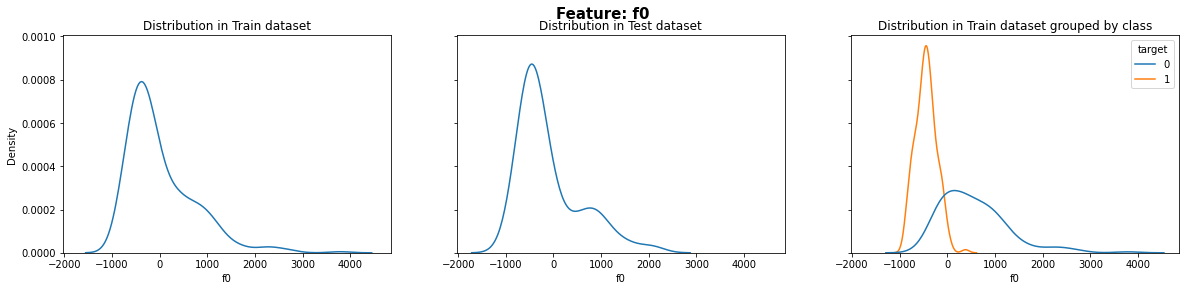

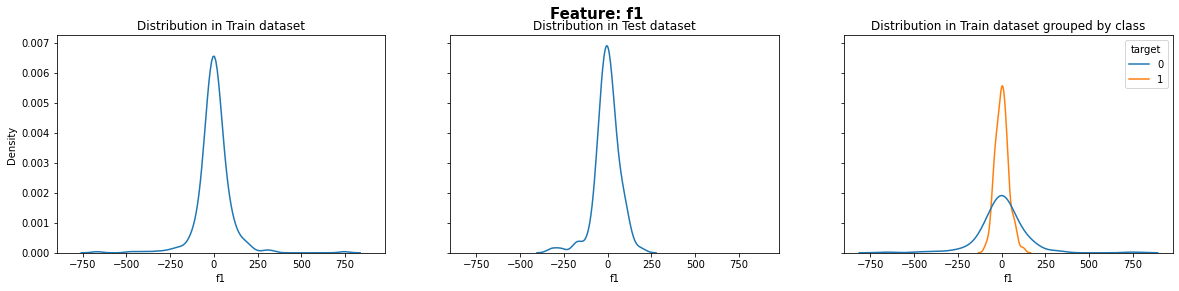

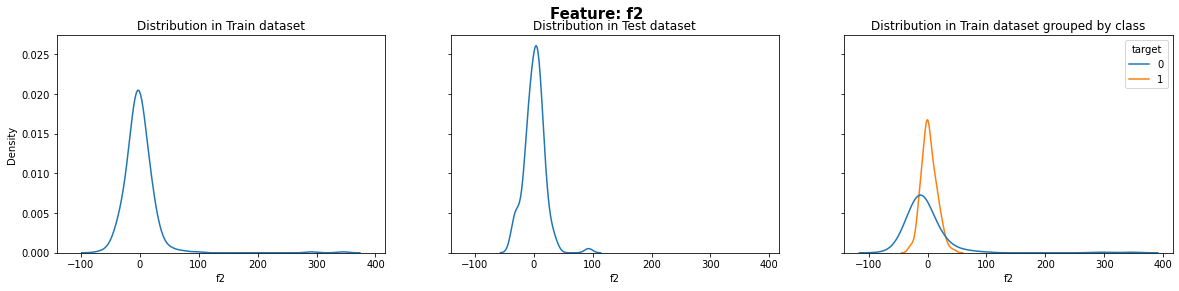

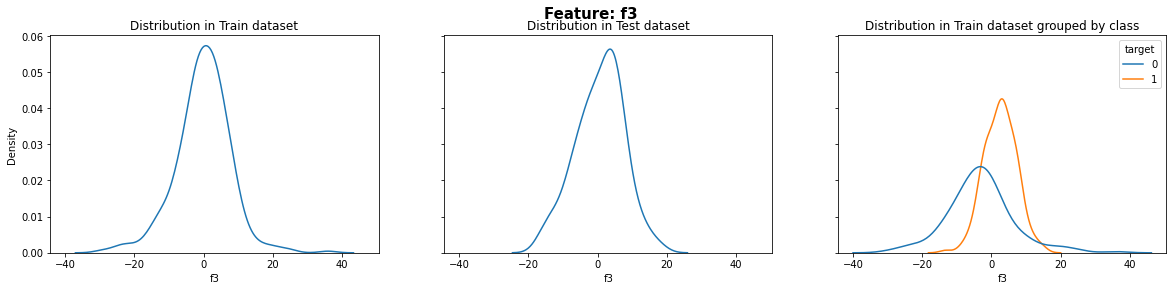

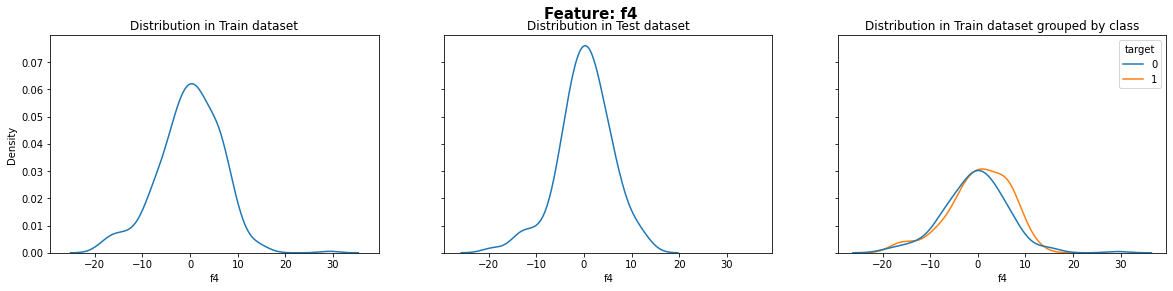

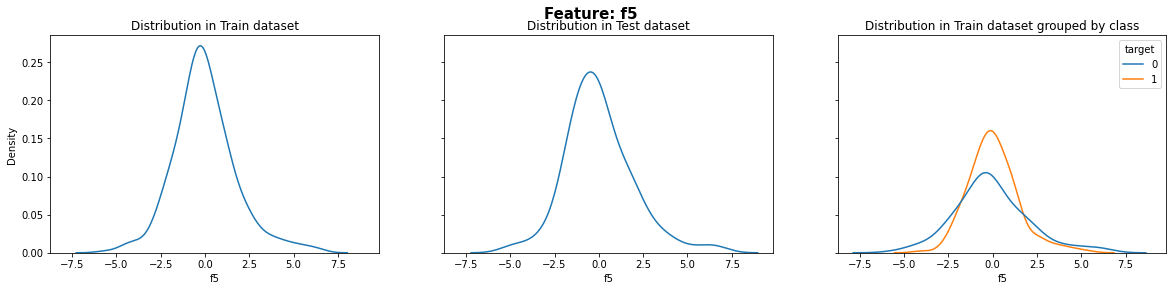

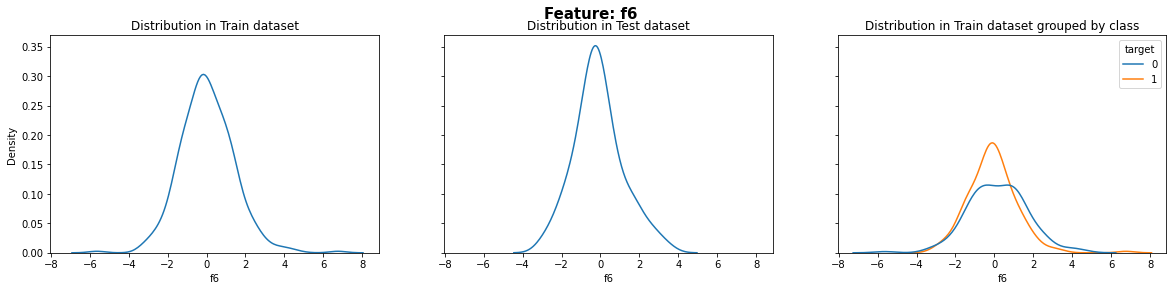

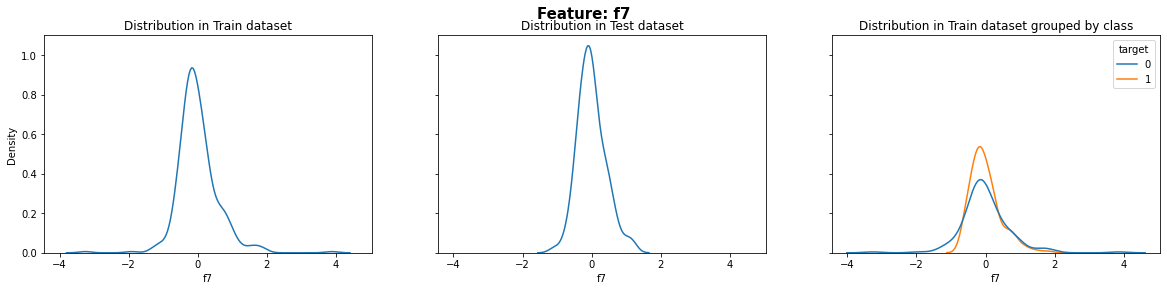

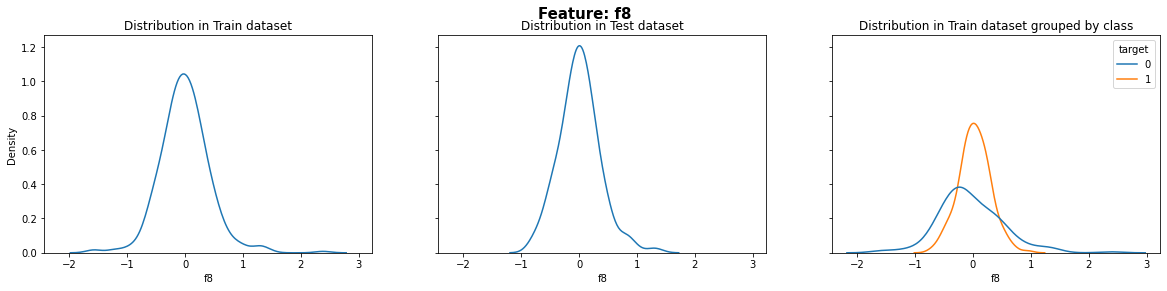

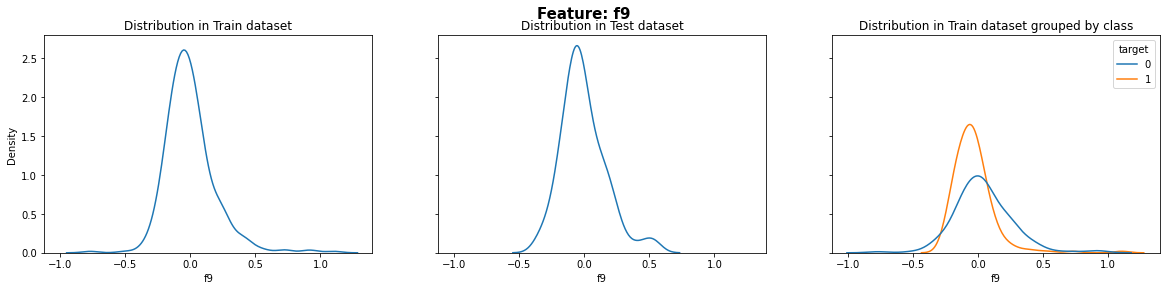

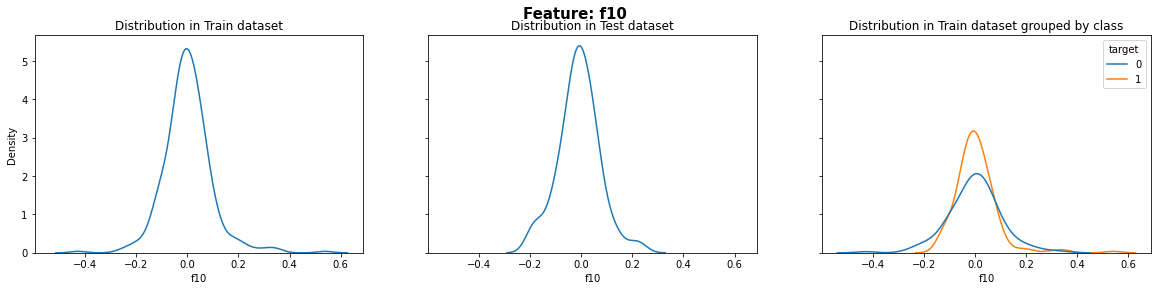

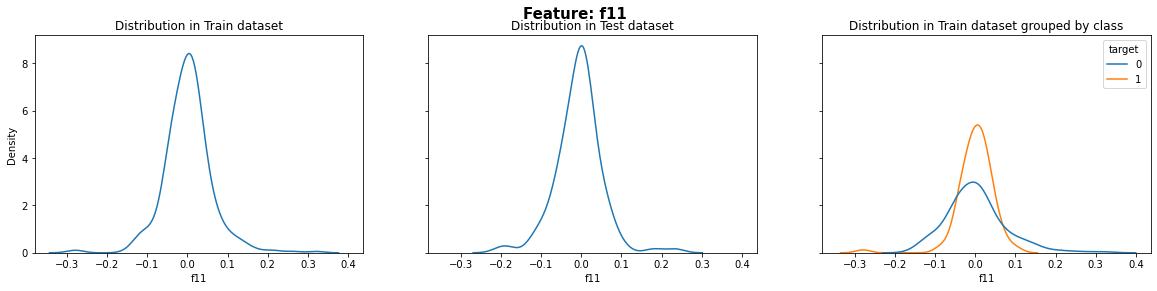

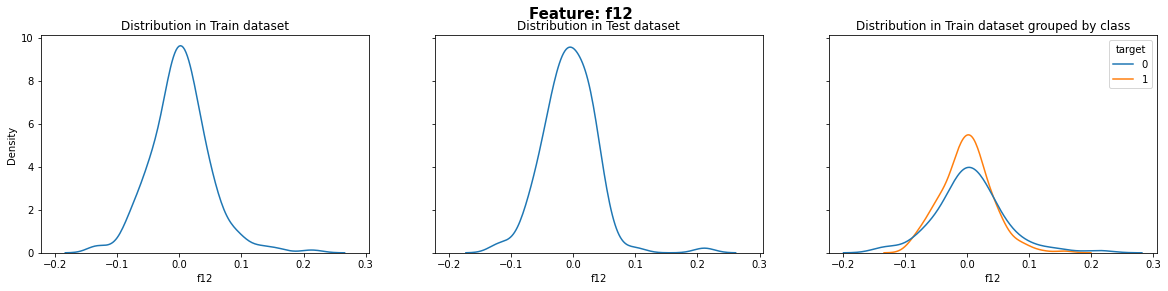

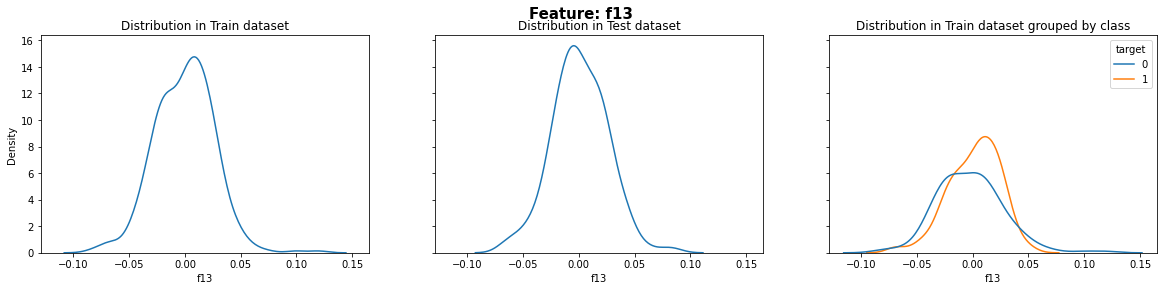

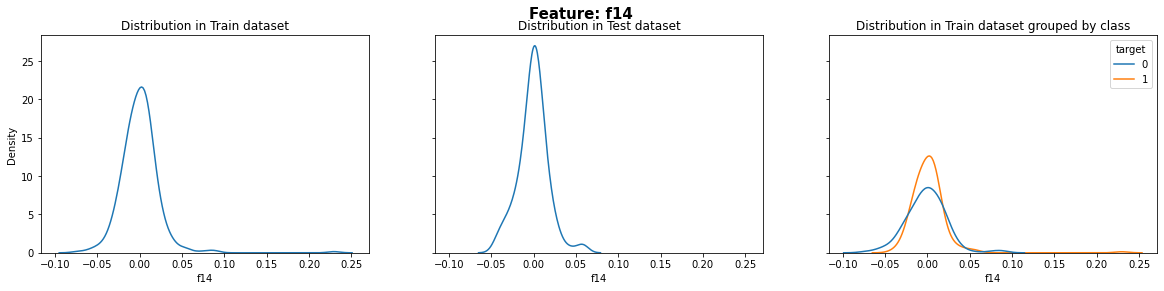

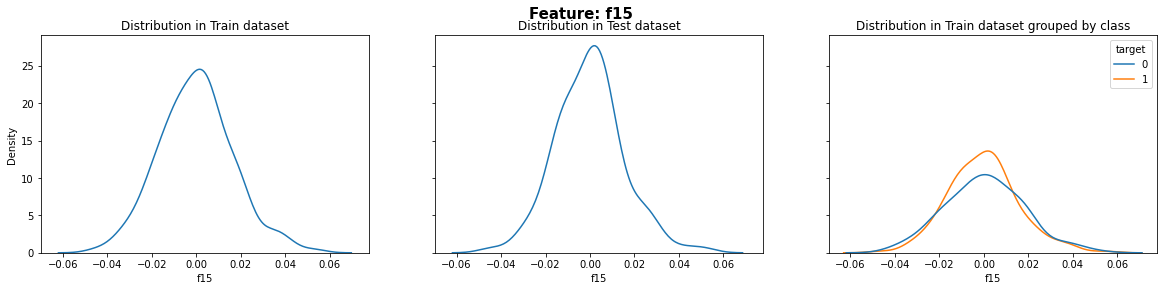

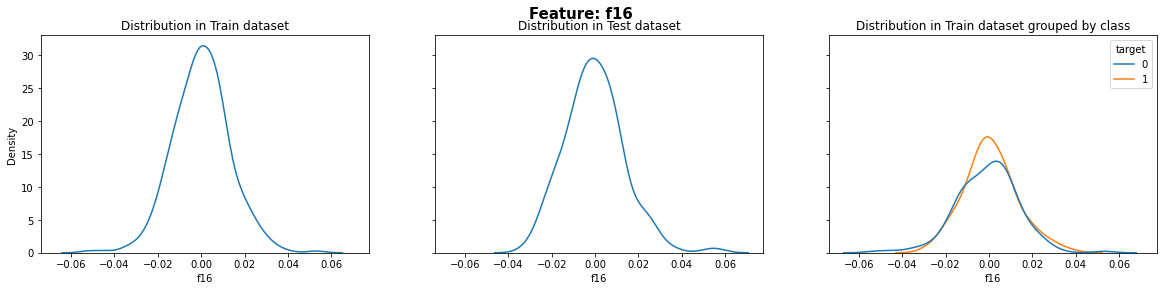

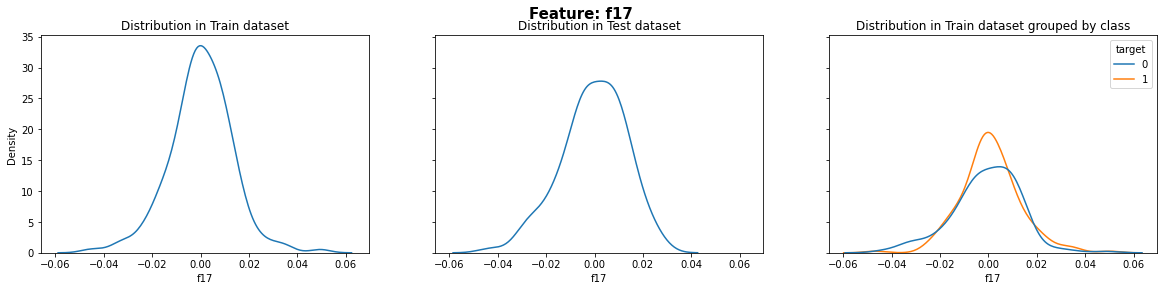

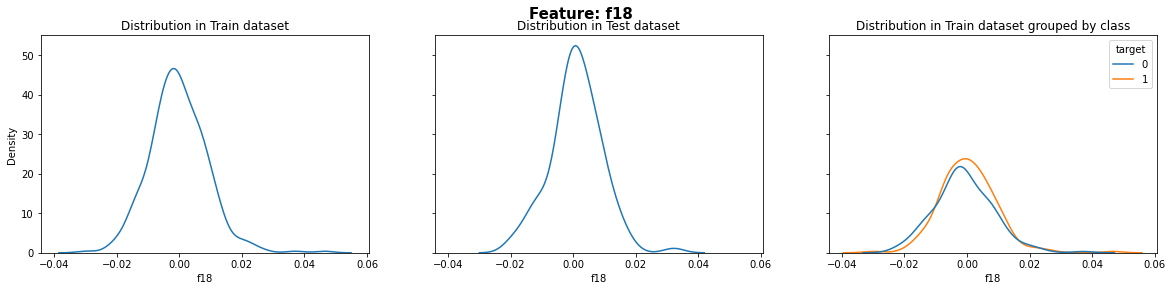

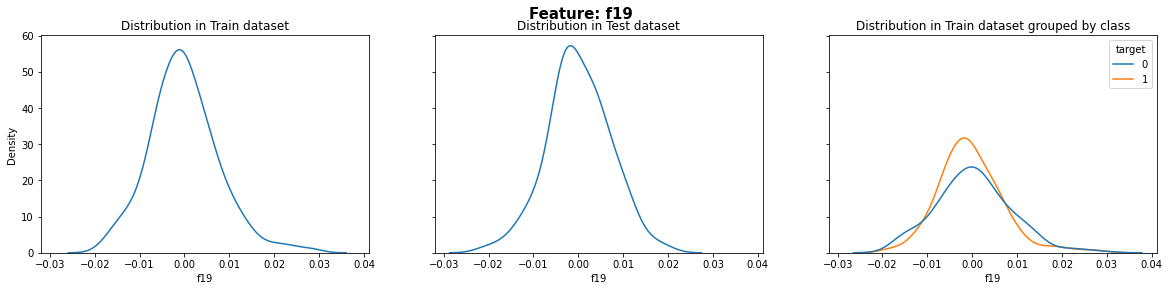

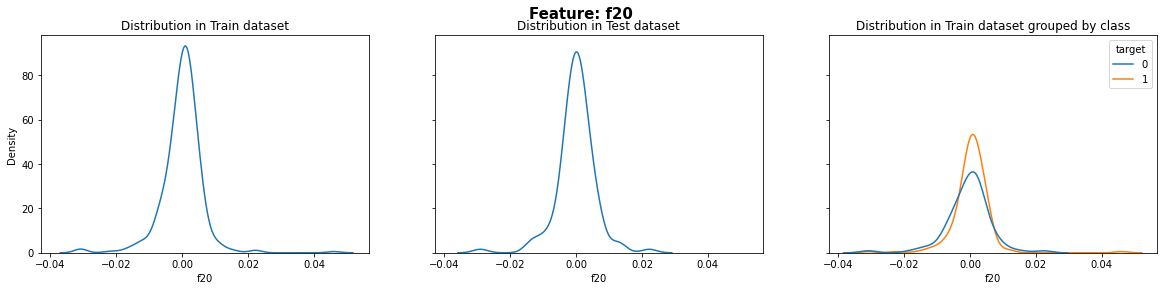

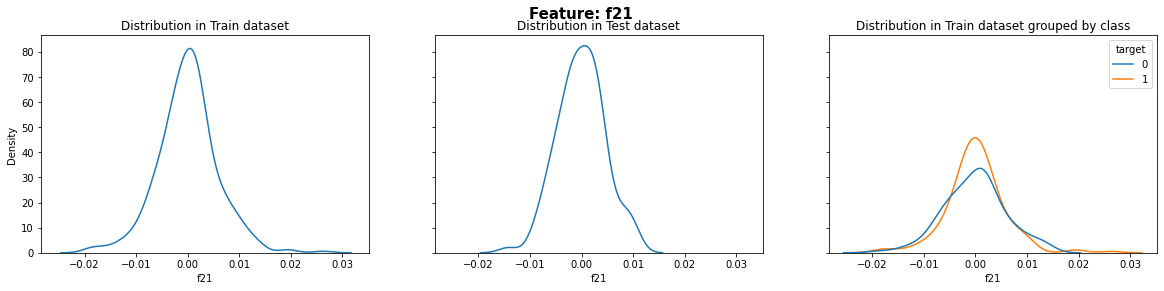

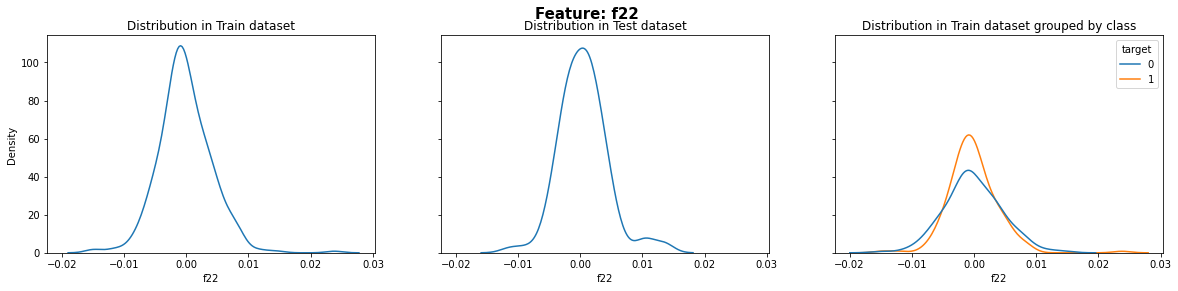

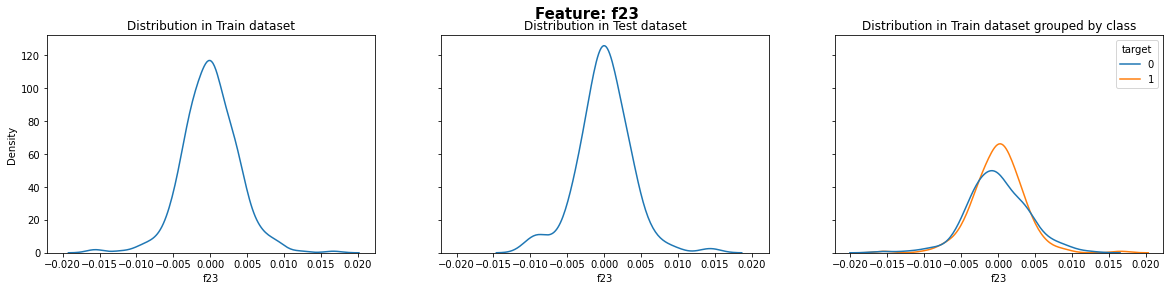

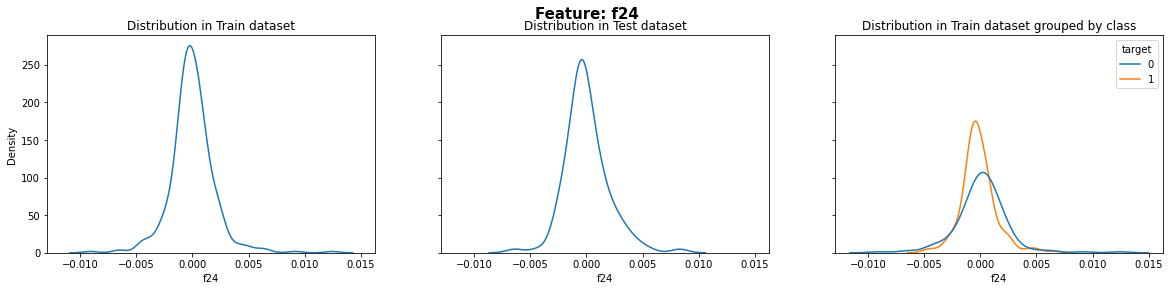

In [11]:
for f in features:
    plot_dist(f)

**Observations:**  
1. All features have similar distributions in Train and Test datasets.  
2. Normal-like distributions for all features.
3. Outliers present for most features in Train dataset compared to the Test dataset. 
4. $f0, f3, f8$ and $f13$ show splits in peak density for the two target classes.

In [12]:
train.groupby('target')[features].agg(['mean', 'median'])

f0                f1              f2               f3          \
            mean    median    mean  median    mean   median    mean  median   
target                                                                        
0       552.2538  427.1384 -0.5156 -1.1392 -3.7128 -10.1564 -3.1588 -3.2304   
1      -448.2557 -455.0037  2.2635  3.1405  2.6074   1.1825  2.5393  2.7962   

            f4              f5              f6              f7          \
          mean  median    mean  median    mean  median    mean  median   
target                                                                   
0      -0.4749 -0.3044 -0.0647 -0.3200  0.1708  0.1336 -0.0032 -0.0980   
1       0.3420  1.1610  0.0462 -0.0424 -0.0971 -0.1363  0.0032 -0.0949   

            f8              f9             f10             f11          \
          mean  median    mean  median    mean  median    mean  median   
target                                                                   
0      -0.0375 -0.1348  0.0398  0.0213 -0.0004  0.0004  0.0024 -0.0025   
1       0.0286  0.0268 -0.0340 -0.0531  0.0053 -0.0032  0.0014  0.0049   

           f12             f13             f14             f15              \
          mean  median    mean  median    mean  median    mean      median   
target                                                                       
0       0.0049  0.0026 -0.0023 -0.0026 -0.0013 -0.0011  0.0004 -1.5150e-04   
1      -0.0008 -0.0002  0.0016  0.0043  0.0014  0.0005 -0.0002 -3.9000e-05   

           f16                 f17             f18             f19          \
          mean      median    mean  median    mean  median    mean  median   
target                                                                       
0      -0.0007  4.9000e-05 -0.0008  0.0005 -0.0009 -0.0014  0.0003 -0.0002   
1       0.0008 -9.1500e-05  0.0009  0.0005  0.0003 -0.0001 -0.0003 -0.0011   

           f20                 f21                 f22                 f23  \
          mean  median        mean      median    mean  median        mean   
target                                                                       
0      -0.0004  0.0004 -7.3651e-05  2.5150e-04 -0.0001 -0.0007 -8.3488e-05   
1       0.0004  0.0008  9.2702e-05  5.6000e-05 -0.0002 -0.0005  6.4436e-05   

                   f24          
        median    mean  median  
target                          
0      -0.0002  0.0001  0.0002  
1       0.0001 -0.0002 -0.0003

Again, we can see significant splits in mean and median based on target for some featuures, while others are basically invariant.  

The magnitude of the changes depend on the ranges of the features but the splits can be corroborated with the density plots.

## Correlation between features

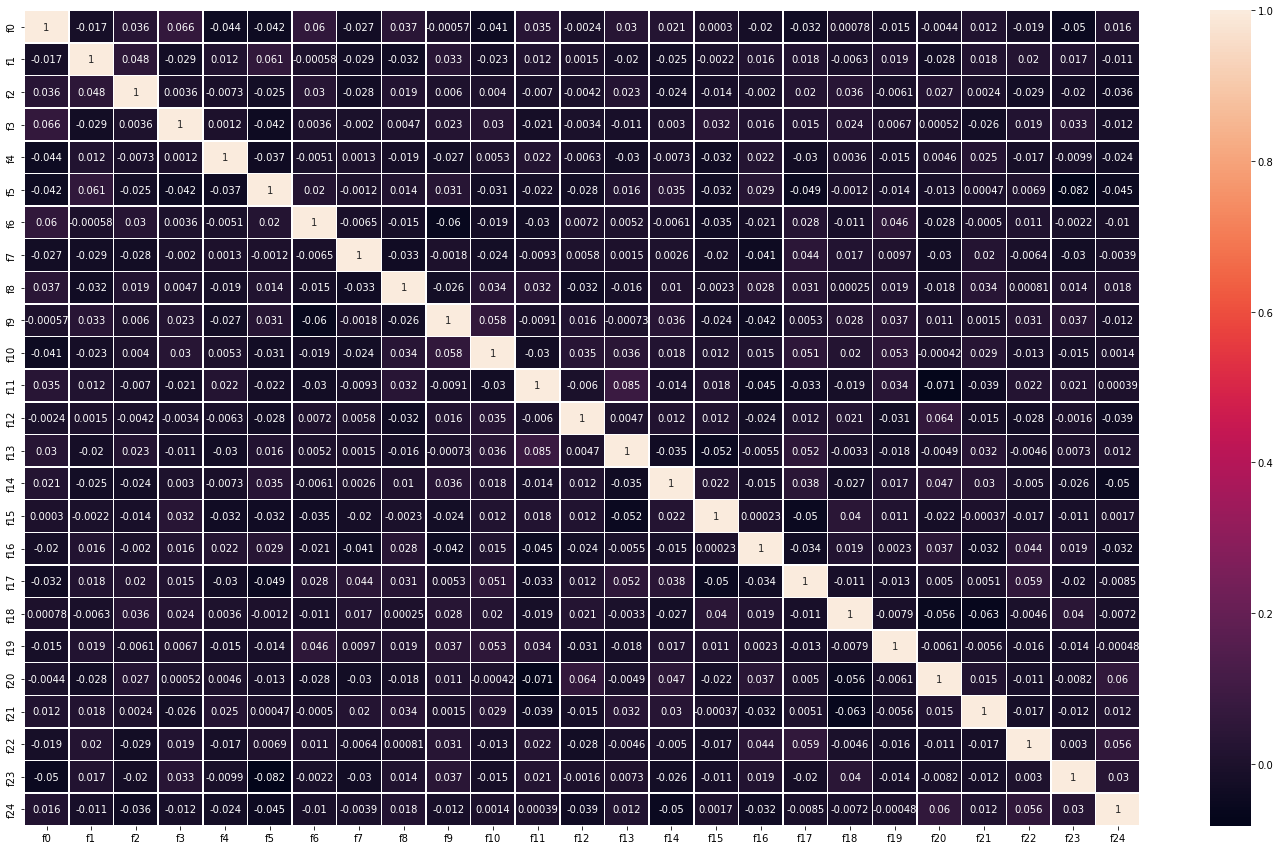

In [13]:
plt.figure(figsize=(25,15))
sns.heatmap(train[features].corr(), annot=True, linewidth=0.5)
plt.show()

No notable correlation between the features.

## Feature importance

### Correlation

Since the target categorical variable has only two values, we can calculate point biserial correlation.

In [14]:
pd.DataFrame(train.corr()['target'][:-1]).transpose()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
target,-0.7003,0.0142,0.101,0.3577,0.0622,0.0311,-0.0963,0.0054,0.0764,-0.188,0.0304,-0.0087,-0.0583,0.0733,0.058,-0.0185,0.0555,0.0648,0.0686,-0.0422,0.0641,0.0142,-0.0069,0.0196,-0.075


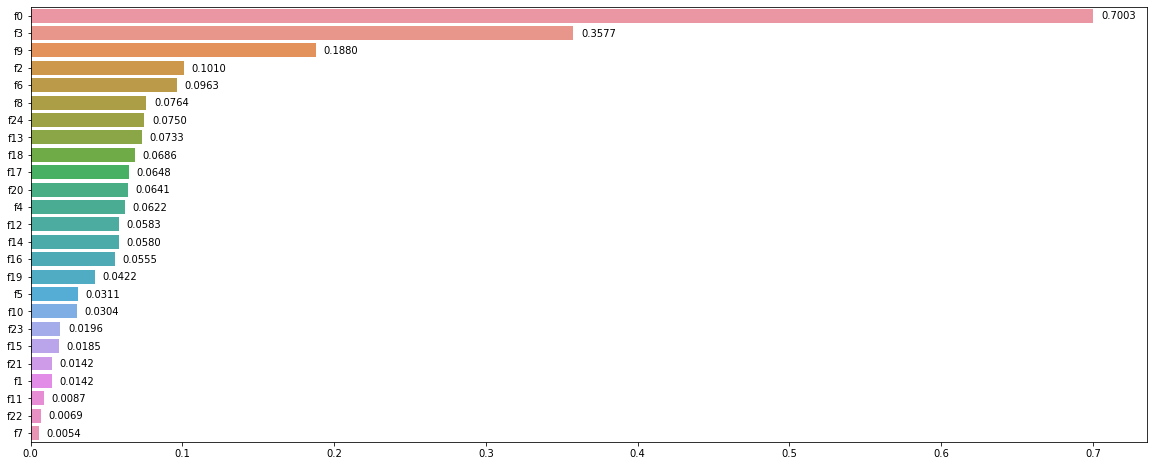

In [15]:
corr_target = abs(train.corr()['target'][:-1]).sort_values(ascending=False)

plt.figure(figsize=(20,8))
ax = sns.barplot(x=corr_target.values, y=corr_target.index)
for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.005
    _y = p.get_y() + p.get_height() - (p.get_height()*0.25)
    value = '{:.4f}'.format(p.get_width())
    ax.text(_x, _y, value, ha="left")
plt.show()

$f0, f3, f8, f13$ are among the features having higher correlation with the target as we saw from the feature distributions, but $f0$ seems to be the only one with significant correlation and $f3$ is a distant second.

### Anova f-test

In [16]:
anova_test = f_classif(train[features], train['target'])
pd.DataFrame(data={'f-statistic': anova_test[0], 
                   'p-value': anova_test[1]}, 
             index=features).transpose()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
f-statistic,3.4458e+02,0.0719,3.6893,5.2518e+01,1.3899,0.3462,3.3540,0.0106,2.1000,13.1140,0.3319,0.0269,1.2218,1.9365,1.2104,0.1229,1.1079,1.5108,1.6929,0.6398,1.4752,0.0722,0.0170,0.1376,2.0261
p-value,2.3135e-54,0.7887,0.0556,2.6417e-12,0.2392,0.5566,0.0679,0.9179,0.1482,0.0003,0.5649,0.8698,0.2698,0.1649,0.2720,0.7261,0.2933,0.2198,0.1941,0.4243,0.2253,0.7883,0.8963,0.7109,0.1555


Only $f0, f3$ and $f9$ have p-value less than 0.05 and are not rejected as features. $f2$ and $f6$ barely get rejected, so we can consider them in an extended feature set.

### Mutual Information score

In [17]:
mi_scores = mutual_info_classif(train[features], train['target'], random_state=SEED)
mi_score_percent = mi_scores / sum(mi_scores) * 100

pd.DataFrame(data={'mi_score': mi_scores,
                   'mi_score_percent': mi_score_percent}, 
             index=features).transpose()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
mi_score,0.4522,0.1043,0.1282,0.1424,0.0175,0.0052,0.0347,0.0253,0.0683,0.0593,0.0231,0.0785,0.0056,0.0,0.0144,0.0,0.0162,0.0136,0.0182,0.0250,0.0128,0.0133,0.0,0.0,0.0241
mi_score_percent,35.2638,8.1370,9.9991,11.1054,1.3655,0.4067,2.7044,1.9762,5.3239,4.6257,1.8003,6.1226,0.4350,0.0,1.1246,0.0,1.2646,1.0631,1.4155,1.9509,0.9996,1.0334,0.0,0.0,1.8828


### Predictive Power Score (PPS)

* [Blog](https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598)
* [Source code and documentation](https://github.com/8080labs/ppscore)

In [ ]:
# %%capture
# !pip install -U ppscore

In [19]:
import ppscore as pps

In [21]:
pps_train = train.copy()
pps_train['target'] = pps_train['target'].astype('category')

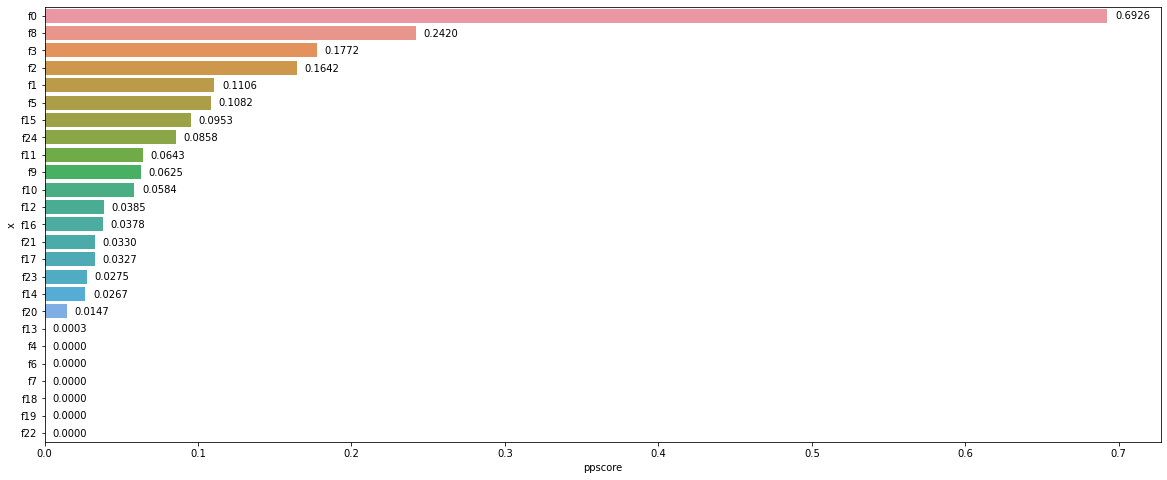

In [29]:
predictors_df = pps.predictors(df=pps_train, y='target', random_seed=SEED)

plt.figure(figsize=(20,8))
ax = sns.barplot(data=predictors_df, y="x", x="ppscore")
for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.005
    _y = p.get_y() + p.get_height() - (p.get_height()*0.25)
    value = '{:.4f}'.format(p.get_width())
    ax.text(_x, _y, value, ha="left")
plt.show()

In [ ]:
matrix_df = pps.matrix(pps_train)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

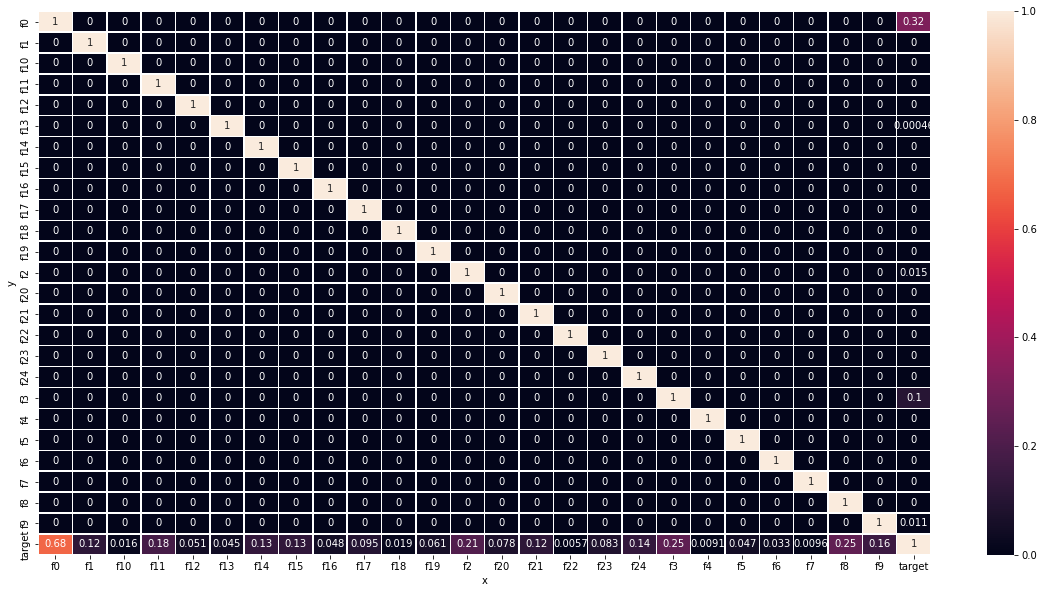

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, linewidths=0.5, annot=True)
plt.show()

Combining all the information, $f0$ is the top feature by a big margin with {$f1, f2, f3, f6, f8, f9, f11$} as an extended feature set.